**ЛР №7 Основные понятия ООП. Наследование. Полиморфизм.**

**Основное задание**




Написать базовый класс BaseProcessing, который предоствляет интерфейс для обработки данных (сигналы и изображения).

В классе BaseProcessing реализовать следующие абстрактные методы:

**Интерфейс BaseProcessing**

* `_filtering()` — осуществляет фильтрацию (абстрактный метод).
* `visualize()` — визуализирует сигнал/изображение (абстрактный метод).
* `get_shape()` — возвращает размерность (абстрактный метод).
* `feature_extraction()` — возвращает вектор признаков (абстрактный метод).


Класс SignalProcessing наследует BaseProcessing и переопределяет его методы

**Интерфейс SignalProcessing** (код для реализации отдельных методов ниже)

* _конструктор_ — принимает на вход путь к файлу и создает соответствующие поля
* `_filtering(signal)` — осуществляет фильтрацию сигнала (возвращает отфильтрованный сигнал).
* `visualize()` — визуализирует сигнал.
* `get_shape()` — возвращает длину сигнала.
* `_signal_find_peaks(signal, find_peaks_parametres)` — находит точки максимума сигнала и возвращает их в виде списка.
* `_calculate_RR_intervals()` — производит расчет длительности RR интервалов (попарных расстояний между пиками) и возвращает длины RR интервалов в виде списка.
В этом методе вызываются методы _filtering и _signal_find_peak.
* `feature_extraction()` — возвращает статистические характеристики RR интервалов на записи ECG - среднее, std, min, max (в виде списка - вектор признаков). В этом методе вызывается метод _calculate_RR_intervals.

Класс ImageProcessing наследует BaseProcessing и переопределяет его методы

**Интерфейс ImageProcessing** (код для реализации отдельных методов из предыдущей лабораторной)

* _конструктор_ — принимает на вход путь к файлу и создает соответствующие поля
* `_filtering(image)` — применяет фильтр Гаусса к изображению (возвращает отфильтрованное изображение).
* `visualize()` — визуализирует изображение.
* `get_shape()` — возвращает размерность изображения.
* `_create_gabor_filter(parameters)` — создает и возвращает фильтр Габора с заданными параметрами.
* `feature_extraction()` — применяет _filtering() к изображению, считает признаки с _create_gabor_filter(parameters)и возвращает вектор признаков: среднее и дисперсию по изображению.

*можно добавить свои методы


Изображение и синал находятся в папке

In [ ]:
pip install wfdb

In [ ]:
pip install heartpy

In [ ]:
#Необходимые модули и функции
from skimage.filters import gabor_kernel
from scipy import ndimage as ndi
import cv2
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import wfdb
import heartpy as hp
from scipy.signal import find_peaks

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###Для изображения

Написать базовый класс BaseProcessing, который предоствляет интерфейс для обработки данных (сигналы и изображения).

В классе BaseProcessing реализовать следующие абстрактные методы:

**Интерфейс BaseProcessing**

* `_filtering()` — осуществляет фильтрацию (абстрактный метод).
* `visualize()` — визуализирует сигнал/изображение (абстрактный метод).
* `get_shape()` — возвращает размерность (абстрактный метод).
* `feature_extraction()` — возвращает вектор признаков (абстрактный метод).


Класс SignalProcessing наследует BaseProcessing и переопределяет его методы

**Интерфейс SignalProcessing** (код для реализации отдельных методов ниже)

* _конструктор_ — принимает на вход путь к файлу и создает соответствующие поля
* `_filtering(signal)` — осуществляет фильтрацию сигнала (возвращает отфильтрованный сигнал).
* `visualize()` — визуализирует сигнал.
* `get_shape()` — возвращает длину сигнала.
* `_signal_find_peaks(signal, find_peaks_parametres)` — находит точки максимума сигнала и возвращает их в виде списка.
* `_calculate_RR_intervals()` — производит расчет длительности RR интервалов (попарных расстояний между пиками) и возвращает длины RR интервалов в виде списка.
В этом методе вызываются методы _filtering и _signal_find_peak.
* `feature_extraction()` — возвращает статистические характеристики RR интервалов на записи ECG - среднее, std, min, max (в виде списка - вектор признаков). В этом методе вызывается метод _calculate_RR_intervals.

Класс ImageProcessing наследует BaseProcessing и переопределяет его методы

**Интерфейс ImageProcessing** (код для реализации отдельных методов из предыдущей лабораторной)

* _конструктор_ — принимает на вход путь к файлу и создает соответствующие поля
* `_filtering(image)` — применяет фильтр Гаусса к изображению (возвращает отфильтрованное изображение).
* `visualize()` — визуализирует изображение.
* `get_shape()` — возвращает размерность изображения.
* `_create_gabor_filter(parameters)` — создает и возвращает фильтр Габора с заданными параметрами.
* `feature_extraction()` — применяет _filtering() к изображению, считает признаки с _create_gabor_filter(parameters)и возвращает вектор признаков: среднее и дисперсию по изображению.

*можно добавить свои методы


Изображение и синал находятся в папке

In [ ]:
from abc import ABC, abstractmethod

class BaseProcessing(ABC):

    @abstractmethod
    def _filtering(self):
        pass

    @abstractmethod
    def visualize(self):
        pass

    @abstractmethod
    def get_shape(self):
        pass

    @abstractmethod
    def feature_extraction(self):
        pass

In [ ]:
class SignalProcessing(BaseProcessing):

    def __init__(self, dict):
        self.data = dict['date']
        self.path_signal = dict['signal']
        self.parameters = dict['parameters']
        self.signal = pd.read_csv(self.path_signal)['MLII']

    def _filtering(self):
        self.filtered = hp.filter_signal(self.signal,
                                         self.parameters['filtration_parametres']['cutoff'],
                                         self.parameters['filtration_parametres']['sample_rate'],
                                         self.parameters['filtration_parametres']['order'],
                                         self.parameters['filtration_parametres']['filtertype'])
        return self.filtered

    def visualize(self):
        plt.plot(self.signal)
        plt.show()

    def get_shape(self):
        return self.signal.shape[0]

    def _signal_find_peaks(self):
        peaks, _ = find_peaks(self.filtered, self.parameters['find_peaks_parametres']['height'])
        return peaks

    def _calculate_RR_intervals(self):
        self._filtering()
        RR_intervals = np.diff(self._signal_find_peaks())/self.parameters['filtration_parametres']['sample_rate']
        return RR_intervals

    def feature_extraction(self):
        RR_intervals = self._calculate_RR_intervals()
        return {'mean': np.mean(RR_intervals),
                'std': np.std(RR_intervals),
                'min': min(RR_intervals),
                'max': max(RR_intervals)}

In [ ]:
a = SignalProcessing({'date': '2024-10-22',
                      'signal': '/content/drive/MyDrive/Colab Notebooks/ecg.csv',
                      'parameters': {'filtration_parametres': {'cutoff': [0.75, 3.5],
                                                               'sample_rate': 100,
                                                               'order': 3,
                                                               'filtertype': 'bandpass'},
                                     'find_peaks_parametres': {'height': 20}}})

In [ ]:
a._filtering()

array([ 2.93669971,  3.29570764,  3.6720113 , ..., 46.85395203,
       40.8126148 , 34.54963788])

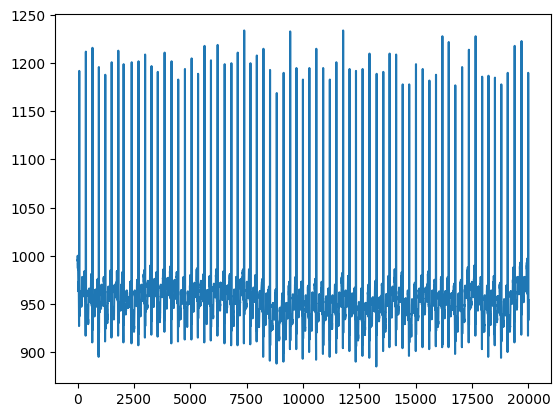

In [ ]:
a.visualize()

In [ ]:
a.get_shape()

20000

In [ ]:
a._signal_find_peaks()

array([   77,   370,   663,   947,  1231,  1515,  1809,  2045,  2403,
        2706,  2998,  3283,  3560,  3863,  4171,  4466,  4765,  5060,
        5347,  5634,  5918,  6214,  6527,  6824,  7106,  7391,  7670,
        7953,  8246,  8539,  8837,  9141,  9431,  9710,  9998, 10282,
       10591, 10894, 11192, 11480, 11781, 12066, 12350, 12645, 12950,
       13267, 13562, 13842, 14131, 14423, 14711, 15011, 15310, 15607,
       15900, 16183, 16465, 16755, 17058, 17358, 17657, 17947, 18227,
       18514, 18796, 19081, 19388, 19693, 19926, 19992])

In [ ]:
a._calculate_RR_intervals()

array([2.93, 2.93, 2.84, 2.84, 2.84, 2.94, 2.36, 3.58, 3.03, 2.92, 2.85,
       2.77, 3.03, 3.08, 2.95, 2.99, 2.95, 2.87, 2.87, 2.84, 2.96, 3.13,
       2.97, 2.82, 2.85, 2.79, 2.83, 2.93, 2.93, 2.98, 3.04, 2.9 , 2.79,
       2.88, 2.84, 3.09, 3.03, 2.98, 2.88, 3.01, 2.85, 2.84, 2.95, 3.05,
       3.17, 2.95, 2.8 , 2.89, 2.92, 2.88, 3.  , 2.99, 2.97, 2.93, 2.83,
       2.82, 2.9 , 3.03, 3.  , 2.99, 2.9 , 2.8 , 2.87, 2.82, 2.85, 3.07,
       3.05, 2.33, 0.66])

In [ ]:
a.feature_extraction()

{'mean': 2.8862318840579713,
 'std': 0.3107732359789018,
 'min': 0.66,
 'max': 3.58}

In [ ]:
class ImageProcessing(BaseProcessing):

    def __init__(self, dict):
        self.data = dict['date']
        self.path_signal = dict['signal']
        self.parameters = dict['parameters']
        self.image = cv2.imread(self.path_signal, cv2.IMREAD_GRAYSCALE)

    def _filtering(self):
        return ndi.gaussian_filter(self.image, self.parameters['gaussian_parameters']['parameter'])

    def visualize(self):
        plt.imshow(self.image)
        plt.show()

    def get_shape(self):
        return self.image.shape

    def _create_gabor_filter(self):
        kernel = np.real(gabor_kernel(self.parameters['gabor_parametres']['frequency'],
                                      theta=self.parameters['gabor_parametres']['theta'],
                                      sigma_x=self.parameters['gabor_parametres']['sigma_x'],
                                      sigma_y=self.parameters['gabor_parametres']['sigma_y']))
        return kernel

    def feature_extraction(self):
        self.conv = ndi.convolve(self._filtering(), self._create_gabor_filter(), mode='wrap')
        return [self.conv.mean(), self.conv.var()]

In [ ]:
b = ImageProcessing({'date': '2024-10-22',
                      'signal': '/content/drive/MyDrive/Colab Notebooks/chest-xray.tif',
                      'parameters': {'gabor_parametres': {'frequency': 0.25,
                                                               'theta': np.pi,
                                                               'sigma_x': 1,
                                                               'sigma_y': 1},
                                     'gaussian_parameters': {'parameter': 0.5}}})

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
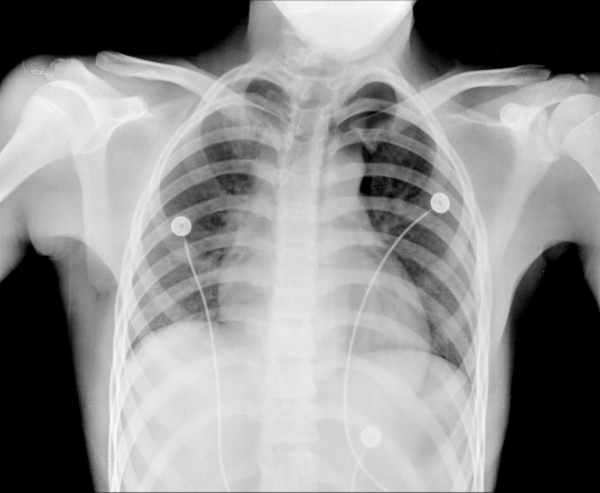

In [ ]:
b._filtering()

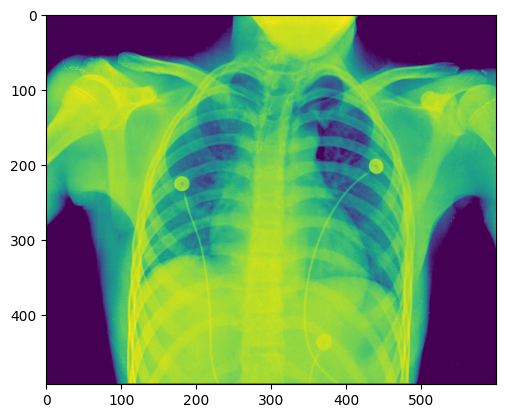

In [ ]:
b.visualize()

In [ ]:
b.get_shape()

(493, 600)

Фильтр Габора: [[-2.10530060e-20 -2.39279779e-04  5.41895496e-19  1.76805171e-03
  -6.48682774e-19 -2.39279779e-04  1.38369167e-20]
 [-2.56478119e-19 -2.91502447e-03  6.60163861e-18  2.15392793e-02
  -5.00173146e-18 -2.91502447e-03  1.68568154e-19]
 [-1.96992564e-19 -1.30642333e-02  1.65858174e-17  9.65323526e-02
  -2.24162052e-17 -1.30642333e-02 -1.96992564e-19]
 [-3.24785830e-19 -2.15392793e-02  5.91090183e-18  1.59154943e-01
   5.91090183e-18 -2.15392793e-02 -3.24785830e-19]
 [-1.96992564e-19 -1.30642333e-02 -2.24162052e-17  9.65323526e-02
   1.65858174e-17 -1.30642333e-02 -1.96992564e-19]
 [ 1.68568154e-19 -2.91502447e-03 -5.00173146e-18  2.15392793e-02
   6.60163861e-18 -2.91502447e-03 -2.56478119e-19]
 [ 1.38369167e-20 -2.39279779e-04 -6.48682774e-19  1.76805171e-03
   5.41895496e-19 -2.39279779e-04 -2.10530060e-20]]


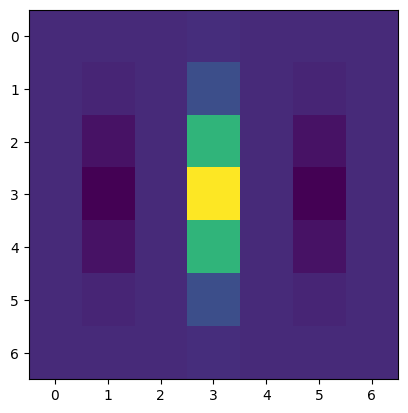

In [ ]:
print(f"Фильтр Габора: {b._create_gabor_filter()}")
plt.imshow(b._create_gabor_filter())
plt.show()

Вектор признаков изображения: [41.113566599053414, 670.1179849805205]


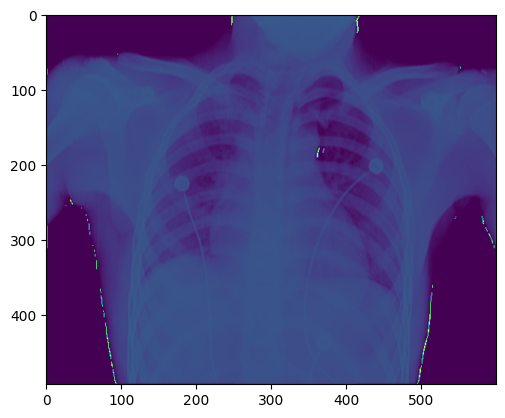

In [ ]:
print(f"Вектор признаков изображения: {b.feature_extraction()}")
plt.imshow(b.conv)
plt.show()